# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for selected two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Main Branch- https://github.com/archinarula/Group-5-Project/Resources


# Dependencies and Data Load

In [1]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

## Import the data

In [2]:
# Add the Resources path variables:
Combined_data="Resources/Final_Combine_Data.csv"

#Read CSVs and Create Dataframes:
Combined_df= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


# Visualizations on Combined Cities data against weather variables

In [3]:
#Combined dataframe
print (Combined_df.shape)
Combined_df.head()


(886, 16)


,Extract_Date,Reported_Date,City,is_newyork,Population,Data_Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [4]:
# Delete extraneous columns
Combined_df=Combined_df.drop(["Population","Data_Source","Extract_Date"], axis=1)
Combined_df.head()

,Reported_Date,City,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2020-03-01,New York,1,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2020-03-02,New York,1,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2020-03-03,New York,1,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2020-03-04,New York,1,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [5]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reported_Date                 886 non-null    datetime64[ns]
 1   City                          886 non-null    object        
 2   is_newyork                    886 non-null    int64         
 3   New_Cases                     886 non-null    int64         
 4   mavg_7day_new_cases           886 non-null    float64       
 5   new_cases_per_100K            886 non-null    float64       
 6   mavg_7day_per_100k_new_cases  886 non-null    float64       
 7   daily_temp                    886 non-null    float64       
 8   daily_humidity                886 non-null    float64       
 9   mavg_7_temp                   886 non-null    float64       
 10  mavg_7_humidity               886 non-null    float64       
 11  mavg_15_temp                  88

In [6]:
import warnings
warnings.filterwarnings("ignore")

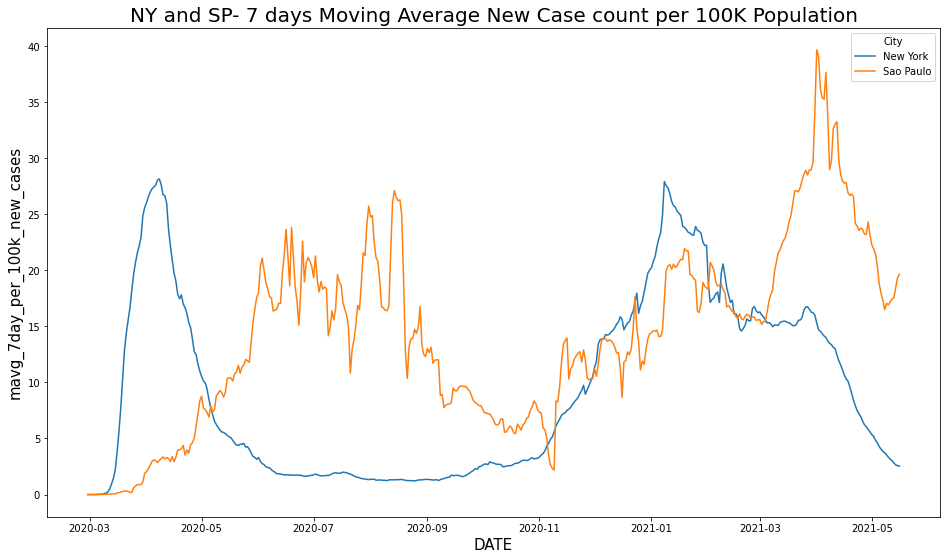

In [7]:
#lineplot using Seaborn- New Cases in two cities(mavg_7day_per_100k_new_cases) 
plt.figure(figsize = (16,9))
sns.lineplot(x = "Reported_Date", y = "mavg_7day_per_100k_new_cases",hue="City", markers=True, dashes=False, data=Combined_df)
plt.title("NY and SP- 7 days Moving Average New Case count per 100K Population", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("mavg_7day_per_100k_new_cases", fontsize = 15)
plt.show()

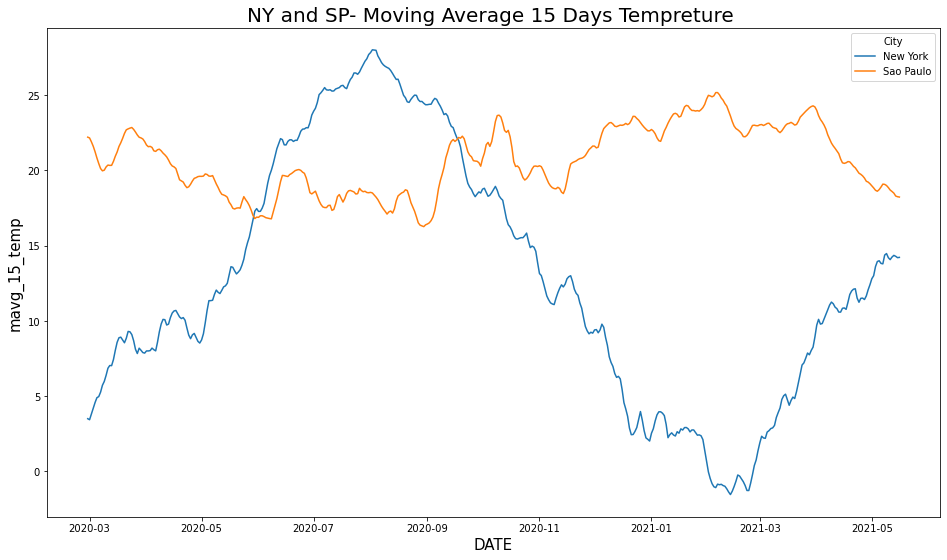

In [8]:
#lineplot using Seaborn- Tempreture in two cities(mavg_15_temp) 
plt.figure(figsize = (16,9))
sns.lineplot(x = "Reported_Date", y = "mavg_15_temp",hue="City", markers=True, dashes=False, data=Combined_df)
plt.title("NY and SP- Moving Average 15 Days Tempreture ", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("mavg_15_temp", fontsize = 15)
plt.show()

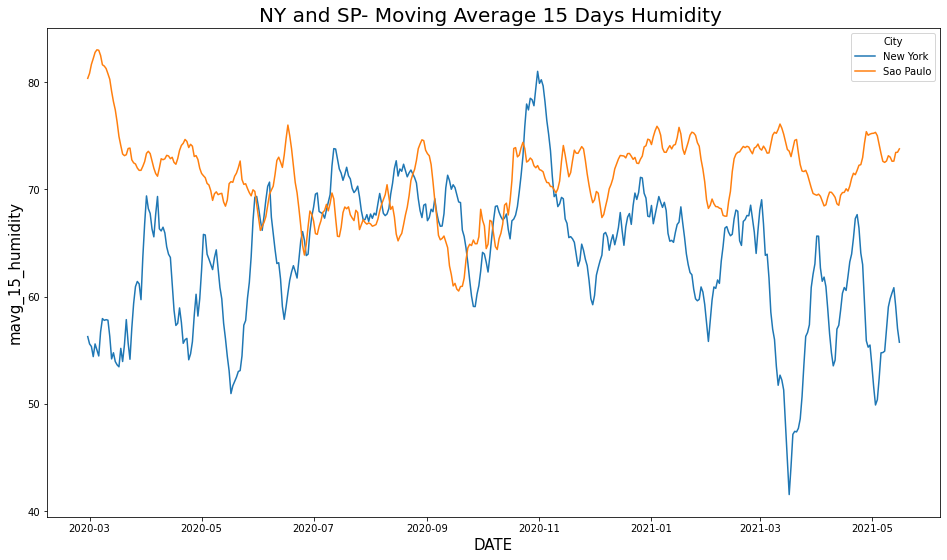

In [9]:
#lineplot using Seaborn- Humidity in two cities(mavg_15_humidity) 
plt.figure(figsize = (16,9))
sns.lineplot(x = "Reported_Date", y = "mavg_15_humidity",hue="City", markers=True, dashes=False, data=Combined_df)
plt.title("NY and SP- Moving Average 15 Days Humidity ", fontsize = 20)
plt.xlabel("DATE", fontsize = 15)
plt.ylabel("mavg_15_humidity", fontsize = 15)
plt.show()

In [10]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reported_Date                 886 non-null    datetime64[ns]
 1   City                          886 non-null    object        
 2   is_newyork                    886 non-null    int64         
 3   New_Cases                     886 non-null    int64         
 4   mavg_7day_new_cases           886 non-null    float64       
 5   new_cases_per_100K            886 non-null    float64       
 6   mavg_7day_per_100k_new_cases  886 non-null    float64       
 7   daily_temp                    886 non-null    float64       
 8   daily_humidity                886 non-null    float64       
 9   mavg_7_temp                   886 non-null    float64       
 10  mavg_7_humidity               886 non-null    float64       
 11  mavg_15_temp                  88

In [11]:
#subset of Combined Dataframe for Pairplotting between few columns mavg_7day_per_100k_new_cases, mavg_15_temp, mavg_15_humidity
# Delete extraneous columns
PP_Combined_df=Combined_df.drop(["is_newyork","mavg_7day_new_cases","new_cases_per_100K", "daily_temp","daily_humidity", "mavg_7_temp", "mavg_7_humidity" ], axis=1)
PP_Combined_df.head()

,Reported_Date,City,New_Cases,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0.01,3.500000,56.268000
1,2020-03-01,New York,0,0.00,3.432000,55.587333
2,2020-03-02,New York,0,0.00,3.816000,55.348667
3,2020-03-03,New York,1,0.00,4.190667,54.404000
4,2020-03-04,New York,5,0.01,4.576667,55.585333


Pairplot to see relationship between Moving Average New Cases with Moving Avg 15 days Tempreture and Humidity


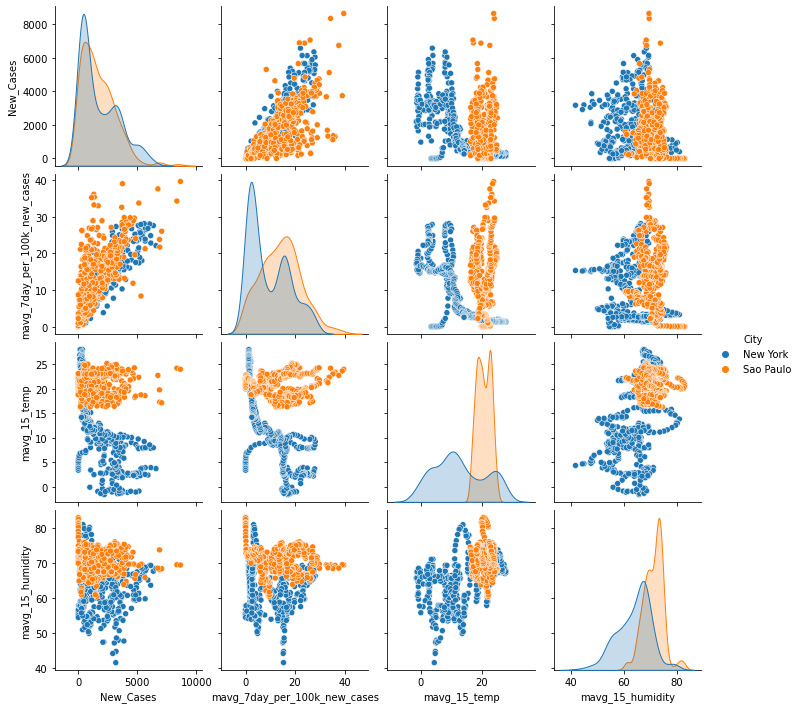

In [12]:
#Pairplot to see relationship on the various columns between the 2 cities
print("Pairplot to see relationship between Moving Average New Cases with Moving Avg 15 days Tempreture and Humidity")
sns.pairplot(data=PP_Combined_df, hue="City")

# Combined Data Level-  Statistical Summary and Outlier Detections

For this I have done the outlier detection only for the identified approach fields i.e mavg_7day_per_100k_new_cases,mavg_15_temp, mavg_15_humidity columns

In [13]:
print (PP_Combined_df.shape)
PP_Combined_df.head()

(886, 6)


,Reported_Date,City,New_Cases,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0.01,3.500000,56.268000
1,2020-03-01,New York,0,0.00,3.432000,55.587333
2,2020-03-02,New York,0,0.00,3.816000,55.348667
3,2020-03-03,New York,1,0.00,4.190667,54.404000
4,2020-03-04,New York,5,0.01,4.576667,55.585333


In [14]:
PP_Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reported_Date                 886 non-null    datetime64[ns]
 1   City                          886 non-null    object        
 2   New_Cases                     886 non-null    int64         
 3   mavg_7day_per_100k_new_cases  886 non-null    float64       
 4   mavg_15_temp                  886 non-null    float64       
 5   mavg_15_humidity              886 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 41.7+ KB


In [15]:
#statistical summary of combined covid data (Moving Avg)
PP_Combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
New_Cases,886.0,1728.985327,1523.776124,0.000000,420.250000,1294.000000,2771.500,8646.000000
mavg_7day_per_100k_new_cases,886.0,11.756433,8.463186,0.000000,3.252500,11.835000,17.510,39.650000
mavg_15_temp,886.0,16.674808,7.247981,-1.542667,11.441500,18.765000,22.268,28.020000
mavg_15_humidity,886.0,67.483323,6.408411,41.545333,64.533333,68.369667,72.228,83.002667


<AxesSubplot:xlabel='mavg_7day_per_100k_new_cases'>

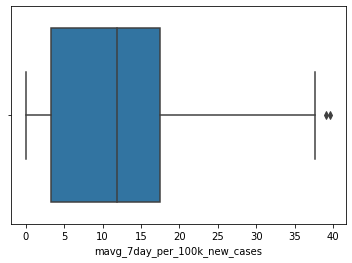

In [16]:
#Finding Outliers in Combined Covid data- Moving 7 Day Avg per 100K

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='mavg_7day_per_100k_new_cases', data = PP_Combined_df)

In [17]:
PP_Combined_df[PP_Combined_df['mavg_7day_per_100k_new_cases']>38]

,Reported_Date,City,New_Cases,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
840,2021-04-01,Sao Paulo,8646,39.65,23.998000,69.444667
841,2021-04-02,Sao Paulo,3743,39.05,23.643333,69.547333


<AxesSubplot:xlabel='mavg_15_temp'>

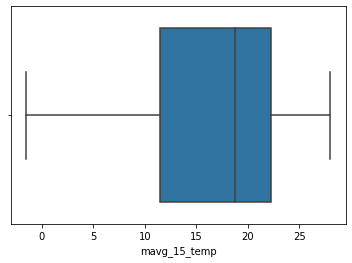

In [18]:
#Finding Outliers in Combined Temp data- Moving 7 Day Avg Tempreture

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='mavg_15_temp', data = PP_Combined_df)

<AxesSubplot:xlabel='mavg_15_humidity'>

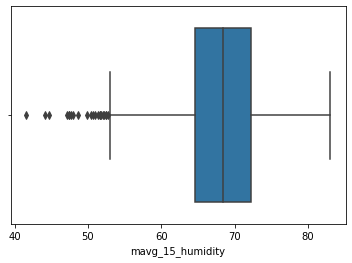

In [19]:
#Finding Outliers in Combined Humidity data- Moving 7 Day Avg Humidity

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='mavg_15_humidity', data = PP_Combined_df)

In [20]:
PP_Combined_df[PP_Combined_df['mavg_15_humidity']<55]

,Reported_Date,City,New_Cases,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
3,2020-03-03,New York,1,0.00,4.190667,54.404000
6,2020-03-06,New York,8,0.02,4.970000,54.464000
13,2020-03-13,New York,619,0.97,7.026000,54.192667
14,2020-03-14,New York,642,1.46,7.428667,54.763333
15,2020-03-15,New York,1035,2.23,8.037333,53.943333
16,2020-03-16,New York,2121,3.79,8.573333,53.635333
17,2020-03-17,New York,2452,5.60,8.879333,53.454667
19,2020-03-19,New York,3707,10.29,8.737333,53.948000
23,2020-03-23,New York,3570,16.66,9.274667,54.156667
55,2020-04-24,New York,2535,15.34,9.058000,54.107333
